# 1. Chargement des données

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()

In [3]:
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# 2. Qualité de données

### 2.1 Table patient

In [4]:
df_patient

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,368617,abby,None,19.0,john cleland crescent,boyne island,2290,nsw,19570210.0,NaN,02 92489054,glenmore
19996,796658,dale,priest,19.0,bellchambers crescent,hoppers crossing,3033,wa,19590619.0,31.0,07 20549476,None
19997,511885,alessia,mawlai,4.0,miller street,smithfield,3616,tas,NaN,26.0,03 83466737,None
19998,985932,hannah,mason,1.0,halligan place,beaumaris,2443,wa,19140304.0,25.0,04 41125514,None


**Types des données :**

In [5]:
df_patient.dtypes

patient_id         int64
given_name        object
surname           object
street_number    float64
address_1         object
suburb            object
postcode          object
state             object
date_of_birth    float64
age              float64
phone_number      object
address_2         object
dtype: object

Nous remarquons déjà les problèmes suivants :
- street_number est de type float64, alors qu'il devrait être de type entier
- postcode est de type object, alors qu'il est censé contenir des entiers (des codes postaux)
- date_of_birth est de type float64, alors qu'il devrait être de type date

**Données manquantes :**

In [6]:
df_patient.isna().any()

patient_id       False
given_name        True
surname           True
street_number     True
address_1         True
suburb            True
postcode          True
state             True
date_of_birth     True
age               True
phone_number      True
address_2         True
dtype: bool

Nous pouvons constater qu'à part pour la colonne patient_id, toutes les colonnes contiennent des valeurs manquantes

**Traitement des colonnes individuellement :**

- **patient_id :**

In [7]:
len(df_patient['patient_id'].unique())

19798

Il y'a 19798 identifients de patients uniques pour 20000 lignes dans le dataset.

- **given_name :**

In [8]:
df_patient['given_name'].value_counts()

emiily      373
joshua      340
thomas      262
jack        260
lachlan     213
           ... 
molli         1
katerlyn      1
tristani      1
noahn         1
jyr           1
Name: given_name, Length: 1171, dtype: int64

Il y'a 1171 noms uniques, de plus nous pouvons remarquer que des prénoms sont mal saisis (par exemple emiily)

De plus, il serait intéressant de regarder les prénoms uniques par ordre inverse d'occurence (La probabilité de se tromper est généralement plus petite que la probabilité d'écrire un prénom correct) :

In [9]:
list(df_patient['given_name'].value_counts(ascending=True).index)

['jyr',
 'noahn',
 'tristani',
 'katerlyn',
 'molli',
 'josef',
 'mitchdkl',
 'nowh',
 'logn',
 'clari',
 'briekle',
 'nichalas',
 'jolly',
 'louus',
 'miles',
 'madelel ine',
 'myg',
 'lindholm',
 'nichols',
 'katrlyn',
 'kempe',
 'hugi',
 'emms',
 'tschirpig',
 'etahn',
 'rocca',
 'hayleu',
 'avs',
 'carbone',
 'mariane',
 'rene',
 'tot',
 'mathew',
 'bodh',
 'ero',
 'giulina',
 'mitxhell',
 'charloete',
 'mitchekl',
 'josh',
 'nicoas',
 'geotgia',
 'tristtn',
 'mathzws',
 'lauen',
 'staude',
 'ki',
 'jejs',
 'zho',
 'jacov',
 'cassody',
 'vendula',
 'mikgaili',
 'flinn',
 'papazacharoudakis',
 'gabriekle',
 'grooby',
 'wiseman',
 'holderhead',
 'joszhua',
 'karsksa',
 'web',
 'kiehrz',
 'isablela',
 'emiiyl',
 'kouzba',
 'keitq',
 'abbiw',
 'mxya',
 'jaggaf',
 'deaikn',
 'joshsu',
 'jac',
 'kone',
 'stveen',
 'jim',
 'clauea',
 'mcgregor',
 'blunden',
 'alexaader',
 'kenneth',
 'isabellg',
 'lee',
 'dan te',
 'samuepl',
 'jadln',
 'taloa',
 'mitchwll',
 'bronna',
 'harridon',
 'hank

Ici, on peut clairement voir des prénoms assez communs mais qui n'apparaissent qu'une seule fois du à un typo comme samuel (écrit samuelp), benjamin (écrit benjmain), jessica (écrit jessifa) etc...

In [10]:
df_patient[pd.isna(df_patient['given_name'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
11,187498,None,mason,20.0,padbury street,granville,6239,qld,19201021.0,38.0,03 85186450,pioneer lodge
17,429365,None,coffey,1409.0,musson close,beaconsfield upper,5019,wa,NaN,30.0,03 13369308,silverweir
56,573254,None,wilde,3.0,must circuit,ormeau,0800,nsw,19590826.0,37.0,04 40239609,None
59,370936,None,coulson,118.0,murphy street,st agnes,2062,qld,19820225.0,33.0,04 05029557,None
69,351995,None,thurlow,12.0,partridge street,trinity park,4507,qld,19080830.0,20.0,08 43244546,None
191,515515,None,newbound,42.0,kingsmill street,belmont north,7250,nsw,19410825.0,22.0,03 73313147,None
256,369536,None,karlsen,76.0,syme crescent,arthurs creek,7290,vic,19630603.0,NaN,02 59641669,None
262,937291,None,mason,8.0,tauss place,franklin,2358,vic,19130504.0,9.0,08 48534922,None
263,225657,None,hamon,164.0,mcelhone court,newborough,5290,qld,19230219.0,25.0,None,None
319,458745,None,hyland,19.0,lucy gullett circuit,ashford,4575,None,19210309.0,35.0,04 89494065,None


Nous pouvons voir aussi qu'il existe 440 patients qui n'ont pas de prénoms (valeur manquante)

- **surname :**

In [11]:
df_patient['surname'].value_counts()

white        539
clarke       438
green        398
ryan         315
campbell     312
            ... 
hemlof         1
huggonson      1
sabbith        1
crkvencic      1
gyergyak       1
Name: surname, Length: 4273, dtype: int64

Il existe 4273 noms de famille uniques dans le dataset, il y'a à priori pas de problème pour l'instant

Même chose comme pour le prénom, nous affichons les noms par ordre inverse d'occurence pour détecter les typos :

In [12]:
list(df_patient['surname'].value_counts(ascending=True).index)

['gyergyak',
 'crkvencic',
 'sabbith',
 'huggonson',
 'hemlof',
 'pennycuick',
 'hadchiti',
 'kumaran',
 'waluler',
 'fenu',
 'rosemoan',
 'krecinic',
 'greeb',
 'utten',
 'challenor',
 'phoebe',
 'ukota',
 'sidney',
 'kennion',
 'gustaz',
 'giampiccolo',
 'warnodk',
 'dehey',
 'chawtur',
 'crooke',
 'wolms',
 'molkenthien',
 'harinen',
 'katnich',
 'adhikari',
 'carich',
 'quinsey',
 'la roche',
 'hereora',
 'edgoose',
 'magripilis',
 'martincvic',
 'bonomo',
 'chloe',
 'dolejs',
 'van wijk',
 'kopilas',
 'anjewierden',
 'alexander',
 'virzu',
 'valiyff',
 'madeira',
 'kondraciuk',
 'lukasiewicz',
 'harsing',
 'beaumont-smith',
 'rives',
 'tossell',
 'sukwatthananan',
 'dulfer-hyams',
 'morganti',
 'garas',
 'remir',
 'mickelsen',
 'hermosisima',
 'katesook',
 'karantonis',
 'voarino',
 'fletcher-uones',
 'charitnopdis',
 'gilfedder',
 'clsrke',
 'builth',
 'tieppo',
 'karafilidis',
 'gaglioti',
 'euakittiroj',
 'fargahry-tolba',
 'mcqualtei',
 'worgan',
 'vidakovic',
 'preo',
 'aujar

On peut voir qu'il y'a plusieurs erreurs de saisie : stephenson (écrit stephenskon), hilton (écrit hiltron ou hiltln) etc...

In [13]:
df_patient[pd.isna(df_patient['surname'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
66,168148,kallie,None,18.0,lampard circuit,bassendean,2632,nsw,19380612.0,NaN,02 37706143,None
291,418394,william,None,42.0,rossarden street,kincumber,3194,sa,19220824.0,41.0,07 78694844,None
336,639439,casey,None,17.0,rosebery street,figtree,2285,nt,19700808.0,NaN,08 36636317,minjarra
391,962645,nathan,None,189.0,dowling street,andergrove,2251,nsw,19620707.0,31.0,04 80737278,None
476,364512,cameron,None,11.0,allcott place,kirra,3825,qld,19180205.0,21.0,08 75358900,None
494,750429,dylan,None,35.0,vasey crescent,wamberal,3820,vic,19270802.0,24.0,02 60649007,villa 32
498,327897,jessica,None,21.0,tatchell street,bayswater,4159,qld,19660505.0,24.0,02 84065665,None
568,303861,dylan,None,5.0,blake place,campsie,2306,nsw,19010730.0,NaN,None,stationyards
587,555968,michaela,None,293.0,james smith circuit,cambridge gardens,6076,nsw,NaN,23.0,03 70118407,None
652,437497,annabel,None,237.0,carron street,flemington,2077,nsw,19200329.0,10.0,04 93378844,None


Il y'a cependant 425 noms de familles manquants.

- **street_number :**

In [14]:
df_patient['street_number'].value_counts()

1.0       628
5.0       568
2.0       557
4.0       546
3.0       545
         ... 
1018.0      1
1811.0      1
899.0       1
311.0       1
755.0       1
Name: street_number, Length: 834, dtype: int64

Il y'a 834 numéros de rue uniques, cependant, les numéros doivent être de type entier plutôt que de type float64

In [15]:
df_patient[pd.isna(df_patient['street_number'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
45,184654,bailey,vanlaatum,NaN,mckail crescent,birtinya,3130,None,19370819.0,39.0,04 35418868,None
197,626981,ryan,weaver,NaN,flanagan street,noble park north,5291,nsw,19270701.0,NaN,08 03117176,None
236,139353,abii,sires,NaN,badimara street,woollahra,2590,vic,19670406.0,NaN,02 16820521,None
237,293075,connor,green,NaN,corowa estate,greenwood,4507,None,19970706.0,34.0,04 00830746,bambridge street
259,277789,charlie,dent,NaN,belah street,belmont,5090,act,19850902.0,24.0,04 25212148,crystal brook farm
310,925816,madeline,secomb,NaN,rusden street,ringwood,4350,vic,19380708.0,NaN,03 95997041,earle haven retirement village
342,898615,noah,tuza,NaN,mcclintock street,bunbury,2117,vic,NaN,29.0,02 17788986,None
406,996048,christian,atsaves,NaN,hartigan garden,peakhurst,4502,None,19871230.0,8.0,04 48334109,bindaree
429,477812,benjamin,ryan,NaN,brewster place,devonport,6010,None,19751011.0,24.0,03 04451541,None
482,712210,jacob,reid,NaN,hedley street,bushland beach,7270,qld,19220211.0,9.0,03 54919641,None


On remarque aussi 382 lignes avec un street_number manquant.

- **address_1 :**

In [16]:
df_patient['address_1'].value_counts()

paul coe crescent    57
burkitt street       56
wilkins street       54
totterdell street    49
namatjira drive      48
                     ..
flockton place        1
key street            1
hugs lane             1
kirwan icrcuit        1
kemp close            1
Name: address_1, Length: 4326, dtype: int64

Il existe 4326 addresses uniques

Nous regardons s'il n'y a pas d'éventuelles erreurs de saisie (en regardant les adresses par ordre inverse d'occurence) :

In [17]:
list(df_patient['address_1'].value_counts(ascending=True).index)

['kemp close',
 'kirwan icrcuit',
 'hugs lane',
 'key street',
 'flockton place',
 'baines place',
 'favell place',
 'meerup street',
 'tarra place',
 'lumbuma place',
 'john clelanddcrescent',
 'beach place',
 'wirria circuit',
 'childe place',
 'parer place',
 'ainslir apenue',
 'hourigan place',
 'point hutt road',
 'checchi place',
 'dewar place',
 'biffinsltreet',
 'florenec wtreet',
 'woden square',
 'kelpie place',
 'laptzicrose',
 'sturt acenue',
 'reddall close',
 'castleton r crescent',
 'hammett place',
 'north street',
 'joel place',
 'gregson place',
 'timbarra crescent',
 'kippbax fair',
 'masonic birks place',
 'maloney close',
 'hargrav eztreet',
 'nummerak close',
 'leggatt street',
 'talbot street',
 'torrens place',
 'nivison place',
 'mundawari',
 'manifold place',
 'roe street',
 'lovekin place',
 'bramina vaation',
 'belah street',
 'wittenoom acrescent',
 'baird place',
 'heath place',
 'wettenhallucircuit',
 'trimmer place',
 'macartney crescent',
 'durackstreet

On peut clairement plusieurs erreurs comme : winstanleystreet (espace manquant), phillip awvenue (au lieu de phillip avenue), osmand nstreet (un n en plus) etc...

In [18]:
df_patient[pd.isna(df_patient['address_1'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
30,447449,andrew,fimmano,83.0,None,clifton springs,2560,nsw,19871005.0,NaN,02 39509342,None
72,356508,elysse,mcfadden,139.0,None,adamstown,7277,qld,19600624.0,35.0,03 03154433,john flynn medical centre
113,336584,georgia,white,8.0,None,swan hill,2161,nsw,19950122.0,NaN,03 19887207,None
177,210687,lucas,fergie,5.0,None,duncraig,6210,None,19421003.0,NaN,08 41146883,cytorna
195,542296,finn,waller,6.0,None,oakleigh,3071,nsw,19621118.0,34.0,04 44650300,vambi back
...,...,...,...,...,...,...,...,...,...,...,...,...
19881,614116,renee,roche,3.0,None,gwandalan,5024,nsw,19520718.0,33.0,02 76871050,None
19908,393812,lani,donaldson,5.0,None,kooyong,2088,vic,19400116.0,NaN,08 84218887,None
19935,447455,timothy,shepherd,9.0,None,wanneroo,3815,wa,19200515.0,23.0,03 54097662,None
19957,159919,zachary,mccarthy,28.0,None,greenacre,6027,None,19260810.0,23.0,08 10488162,None


Avec 796 lignes qui ont une adresse inconnue.

- **suburb :**

In [19]:
df_patient['suburb'].value_counts()

toowoomba           167
frankston           109
port macquarie       93
brighton             92
blacktown            91
                   ... 
palmertzon            1
cue                   1
girilambone           1
cranbournr north      1
balnarring beach      1
Name: suburb, Length: 2925, dtype: int64

Il existe 2925 banlieues uniques

Nous vérifions ensuite les erreurs de saisie :

In [20]:
list(df_patient['suburb'].value_counts(ascending=True).index)

['balnarring beach',
 'cranbournr north',
 'girilambone',
 'cue',
 'palmertzon',
 'burketown',
 'long plains',
 'navarre',
 'mona vle',
 'loch',
 'nerong',
 'speddingup east',
 'mount p erry',
 'dianellw',
 'hampshire',
 'chudleigh',
 'terrqnra',
 'yarrambat',
 'moyston',
 'lucknow',
 'goolmangar',
 'burnite',
 'merino',
 'marlo',
 'spring hell',
 'northcliffe',
 'shorewell',
 'dianela',
 'laverton south',
 'emu pajrk',
 'south maclean',
 'burwold',
 'western creek',
 'condong',
 'scarsdale',
 'quilpie',
 'cape clear',
 'springbrook',
 'morongla creek',
 'gununa',
 'hopefield',
 'port faury',
 'east gresford',
 'sprihmgwood',
 'eight mioe aplains',
 'burleig h wsters',
 'gowrie mountain',
 'lee man',
 'withersfield',
 'wyalkatchem',
 'toroto',
 'wesley vale',
 'ancona',
 'greendale',
 'glenugie',
 'north s ives',
 'silverwater',
 'yielima',
 'keilorfeast',
 'beenkeigh',
 'north motton',
 'alice spaings',
 'shorewell park',
 'barringun',
 'karrabin',
 'lower wonga',
 'ilfracombe',
 'cen

Encore une fois, plusieurs typos sont venus se glisser comme : somertonpark (espace manquant), clarmont meadows (claremont au lieu de clarmont).

> Note : les vérifications de ces typos a été faite grâce à des recherches sur google pour vérifier si chaque banlieue est bien ortographiée.

In [21]:
df_patient[pd.isna(df_patient['suburb'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
18,164820,lia,wilde,30.0,elsey street,None,3109,qld,19070704.0,NaN,03 98048163,None
121,555808,victoria,le lievre,5.0,bainton crescent,None,3289,vic,NaN,22.0,08 77202654,None
375,539430,joshua,pascale,1.0,lawrence crescent,None,4035,nsw,19381126.0,NaN,02 28147669,None
390,829650,fraser,howie,18.0,burdett crescent,None,4059,vic,19880415.0,31.0,02 79974105,None
438,613758,alessandra,gerritsen,52.0,upton street,None,3976,vic,19500807.0,NaN,02 60963683,claymore springs
457,833429,joel,matthews,22.0,jenkins street,None,5155,vic,19780617.0,9.0,08 81716978,smithfield house
552,473632,kylee,feleppa,39.0,mirrool street,None,4300,vic,NaN,34.0,03 65133396,mossburn
608,640652,casey,bloomfield,109.0,None,None,3059,nsw,19070113.0,20.0,03 39506434,bellevue gardens rv
632,591072,cameron,white,10.0,steinfeld court,None,4037,vic,19341003.0,23.0,04 99070248,corella
656,600328,ebony,heesemans,54.0,henderson street,None,3156,None,19300928.0,30.0,02 85220029,None


Avec 212 lignes lignes manquantes

- **postcode :**

In [22]:
print(df_patient['postcode'].unique().shape)
df_patient['postcode'].unique()

(2022,)


array(['2527', '2074', '2305', ..., '3251', '5485', '6201'], dtype=object)

Il y'a 2022 code postaux uniques, cependant le type de postcode devrait être `int64` et pas `object`

Nous allons maintenant voir s'il n'y a pas des codes postaux incohérents :

In [153]:
incoherent_postcodes = []
for i,row in df_patient.iterrows():
    try:
        float(row['postcode'])
    except:
        incoherent_postcodes.append(row['postcode'])
incoherent_postcodes = np.array(incoherent_postcodes)

In [24]:
incoherent_postcodes[incoherent_postcodes!=None]

array(['port noarlunga south', 'naremburn', 'toowoobma', 'brighton',
       'oraneg', 'blacktown', 'forest hill', 'port lincoln', 'ashfield',
       'forest hill', 'toowoomba', 'regents park', 'kelmscott',
       'donnybrook'], dtype=object)

Nous constatons que ces valeurs sont totalement incohérentes et ne devraient pas apparaître dans cette colonne. Il s'agit probablement d'une inversion entre postcode et suburb comme nous pouvons le voir ci-dessous :

In [25]:
df_patient[df_patient['postcode'].isin(incoherent_postcodes[incoherent_postcodes!=None])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
3976,810644,juliana,grosvenor,5.0,connelly pace,3023,port noarlunga south,tas,19991215.0,NaN,03 55227740,None
4080,986559,kirra,choi-lundberg,102.0,centaurus street,6168,naremburn,vic,19261104.0,27.0,08 69584599,None
5792,752873,lochlan,blake,258.0,None,4216,toowoobma,wa,19080821.0,31.0,02 84630666,None
6218,902348,isaac,nakoje,19.0,collier street,6017,brighton,None,19640421.0,8.0,02 69439226,None
6618,678110,jaden,green,5.0,dovey place,3185,oraneg,vic,19151204.0,23.0,02 73534391,None
9653,690348,andrew,ryan,20.0,mainwaring rich circuit,3020,blacktown,wa,19760001.0,22.0,None,None
9718,727290,tiffany,loukes,31.0,leal place,467l0,forest hill,nsw,19760706.0,23.0,None,pangani
11333,738103,hugi,pascoe,167.0,leita court,3023,port lincoln,nsw,19040401.0,NaN,07 84786511,None
14255,684359,sonia,green,50.0,kalgoorlie crescent,6112,ashfield,sa,NaN,9.0,03 46671647,None
15479,355033,abby,yoob,243.0,weston street,3181,forest hill,None,19660615.0,26.0,02 68667816,None


In [26]:
df_patient[pd.isna(df_patient['postcode'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
95,587879,lillianna,mdonald,12.0,newman morris circuit,coombabah,None,vic,19351020.0,26.0,03 90265874,hazel hill
144,451279,emiily,wilkey,78.0,catani place,thornlie,None,nsw,19560516.0,NaN,07 82156796,None
161,723094,stephanie,kilby,22.0,kenyon circuit,brooweena,None,nsw,19080109.0,33.0,03 81017217,None
214,237848,amaya,clisby,175.0,rutherford crescent,downer,None,None,19531215.0,8.0,07 19639912,boxwood hill
425,559451,victoria,clarke,70.0,warragamba avenue,ringwood,None,vic,19210903.0,35.0,04 30756412,None
436,789944,None,dolliver,5.0,fawkner street,judds creek,None,nsw,19900331.0,32.0,07 91663216,None
453,297392,jayden,lodge,1.0,hytten place,bicton,None,nsw,NaN,NaN,None,kippilaw
570,554605,lewis,robson,45.0,miller street,paddington,None,sa,19900810.0,32.0,08 92978336,None
797,130355,stella,nguyen,196.0,callabonna street,wattle glen,None,vic,19521113.0,25.0,03 58363786,view banks cottage
859,109337,gianni,papageorgiou,20.0,hobbs street,wagaman,None,None,19211005.0,12.0,03 98411510,brambletye vinyard


Il y'a aussi 199 lignes qui ne contiennent pas de code postal.

- **state :**

In [27]:
df_patient['state'].value_counts()

nsw     6143
vic     4352
qld     3516
wa      1580
sa      1391
tas      507
act      250
nt       132
nss        7
ns         6
ws         6
ql         5
nsq        4
qlc        3
vix        3
nse        3
nsa        3
vid        2
wab        2
s          2
qlf        2
nsc        2
vich       2
ic         2
wr         2
nsd        2
gic        2
nxw        2
nu         2
qkd        2
qls        2
vib        1
qlt        1
a          1
ta         1
vc         1
nsg        1
nfsw       1
vicz       1
qod        1
vicw       1
qlr        1
tab        1
nswb       1
nsza       1
vicb       1
nfw        1
ndw        1
qldy       1
nssw       1
vuv        1
nswt       1
wq         1
naw        1
nswf       1
qle        1
nswm       1
ai         1
qud        1
nwd        1
wz         1
nlw        1
nsew       1
vucm       1
qxlj       1
vil        1
tad        1
qdd        1
w          1
vq         1
qldg       1
nwx        1
tak        1
vicf       1
nswn       1
vmv        1
sv         1

Il existe 102 états différents. Mais il est clair qu'il y'a des typos, en effet l'abbréviation d'un état ne peut pas être une seule lettre ('s', 'a', 'w'), il y'a même peut être d'autres noms d'états qui ont été mal saisis (nsxw,fsw etc...)

In [29]:
df_patient[pd.isna(df_patient['state'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
21,818315,ruby,grafton,97.0,dannevig place,st clair,3180,None,19180714.0,23.0,02 12194238,glenwarren
28,314176,talia,mitton,10.0,starling place,broken hill,2117,None,19520229.0,8.0,07 43440041,alexander's folly
36,970910,tabitha,friman,8.0,howitt street,bulimba,2800,None,19070513.0,40.0,07 30294882,None
38,249503,lucas,katsiavos,20.0,shakespeare crescent,nightcliff,4655,None,19921005.0,NaN,02 58639506,kangaroo grnd
45,184654,bailey,vanlaatum,NaN,mckail crescent,birtinya,3130,None,19370819.0,39.0,04 35418868,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19952,916593,matthew,wht,NaN,altson circuit,midvale,3204,None,19120978.0,NaN,07 93690529,None
19956,770095,alexia,bridgland,18.0,harrison street,lismore,2020,None,NaN,NaN,07 09296938,None
19957,159919,zachary,mccarthy,28.0,None,greenacre,6027,None,19260810.0,23.0,08 10488162,None
19972,144588,jamie,chandler,128.0,rosman circuit,whitfield,3355,None,19051211.0,42.0,08 53766398,the willows


En plus, 1990 lignes ont leur état qui est manquant.

- **date_of_birth :**

In [30]:
df_patient['date_of_birth'].value_counts()

19040401.0    7
19850503.0    6
19220519.0    6
19630130.0    6
19510108.0    6
             ..
19380908.0    1
19530213.0    1
19260620.0    1
19811113.0    1
19830604.0    1
Name: date_of_birth, Length: 13654, dtype: int64

Il y'a 13654 dates de naissances uniques. Cependant, ce format de données de convient pas du tout pour des dates, et il faut les encoder sous forme de date plutôt que de float64.

In [31]:
sorted(df_patient['date_of_birth'].unique())

[12900410.0,
 19000106.0,
 19000125.0,
 19000212.0,
 19000216.0,
 19000223.0,
 19000228.0,
 19000310.0,
 19000401.0,
 19000418.0,
 19000424.0,
 19000509.0,
 19000511.0,
 19000515.0,
 19000528.0,
 19000618.0,
 19000630.0,
 19000703.0,
 19000707.0,
 19000710.0,
 19000711.0,
 19000718.0,
 19000719.0,
 19000725.0,
 19000911.0,
 19000922.0,
 19000923.0,
 19000925.0,
 19001016.0,
 19001020.0,
 19001121.0,
 19001124.0,
 19001130.0,
 19001218.0,
 19006618.0,
 19010121.0,
 19010124.0,
 19010129.0,
 19010202.0,
 19010204.0,
 19010205.0,
 19010224.0,
 19010228.0,
 19010308.0,
 19010313.0,
 19010317.0,
 19010323.0,
 19010407.0,
 19010525.0,
 19010527.0,
 19010529.0,
 19010601.0,
 19010605.0,
 19010612.0,
 19010618.0,
 19010625.0,
 19010627.0,
 19010722.0,
 19010727.0,
 19010820.0,
 19010821.0,
 19010904.0,
 19010905.0,
 19011012.0,
 19011016.0,
 19011025.0,
 19011122.0,
 19011126.0,
 19011206.0,
 19011207.0,
 19011214.0,
 19011215.0,
 19011222.0,
 19020101.0,
 19020106.0,
 19020109.0,
 19020115.0,

Nous remarquons en triant les dates par ordre croissant que des dates sont incohérentes, la date 12900410 corresponderait au 10 avril 1290, ce qui n'est pas vraiment possible...

Nous vérifions s'il n'y a pas d'autres dates incohérentes (mois ou jour trop grand, un 30 février etc...)

In [32]:
incoherent_dates = []
for i in range(df_patient.shape[0]):
    try:
        date = df_patient.loc[i,'date_of_birth']
        if not pd.isna(date):
            date = str(int(date))
            pd.to_datetime(date)
    except:
        incoherent_dates.append(i)
incoherent_dates

[40,
 145,
 244,
 481,
 539,
 635,
 660,
 822,
 842,
 864,
 1047,
 1129,
 1361,
 1572,
 1655,
 1661,
 1664,
 1673,
 1846,
 1941,
 2155,
 2197,
 2223,
 2236,
 2443,
 2591,
 2706,
 2711,
 2712,
 2905,
 3051,
 3149,
 3228,
 3303,
 3306,
 3526,
 3528,
 3572,
 3619,
 3968,
 4040,
 4074,
 4083,
 4137,
 4189,
 4377,
 4395,
 4427,
 4525,
 4551,
 4600,
 4686,
 4767,
 4969,
 5180,
 5498,
 5591,
 5712,
 5895,
 5933,
 6161,
 6243,
 6410,
 6427,
 6553,
 6694,
 6801,
 6824,
 7038,
 7278,
 7341,
 7550,
 7634,
 7670,
 7699,
 7822,
 7826,
 7968,
 8264,
 8592,
 8620,
 8683,
 8759,
 8787,
 8882,
 8942,
 8971,
 9058,
 9140,
 9154,
 9441,
 9495,
 9653,
 9835,
 10142,
 10311,
 10358,
 10610,
 10659,
 11047,
 11127,
 11705,
 11925,
 12077,
 12182,
 12726,
 13213,
 13254,
 13411,
 13529,
 13613,
 13674,
 13716,
 13863,
 13910,
 13973,
 14198,
 14231,
 14237,
 14430,
 14457,
 14996,
 15019,
 15074,
 15375,
 15386,
 15410,
 15546,
 15714,
 15796,
 15978,
 15979,
 16017,
 16056,
 16091,
 16150,
 16480,
 16640,
 

In [33]:
df_patient.loc[incoherent_dates]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
40,627035,ellorah,parr,12.0,bosworth circuit,ardeer,3523,sa,19030539.0,36.0,08 40688028,killune
145,921654,connor,mccaxbthy,2.0,shirra close,keiraville,5153,vic,19179318.0,24.0,08 20081083,blue hills
244,691460,benjamin,weidenhoffer,436.0,kadina crescent,joyndr,7310,act,19541242.0,39.0,03 02607538,None
481,584299,ethan,girdler,20.0,cantor crescent,westfield,3419,nsw,19990353.0,NaN,04 43439217,None
539,200235,mitchell,stephenson,56.0,rosman circuit,eastwood,2539,sa,19328814.0,39.0,03 85151806,None
635,431593,adam,schumann,20.0,bunurung close,bonython,2289,nsw,19279326.0,23.0,02 01272164,None
660,976020,hunter,mccarthy,83.0,namadgi circuit,wynhaed,3030,sa,19770296.0,37.0,03 30649505,None
822,753983,james,white,197.0,woolcock street,kingrao,2483,vic,19510184.0,13.0,02 86879035,None
842,359214,hannah,strcck,1.0,academy close,kingsford,2159,vic,19399702.0,27.0,08 98425146,None
864,446809,joshua,sidman,61.0,legacy vlge,tweed heads,3057,None,19080025.0,42.0,03 03072599,jelbart street


Nous remarquons qu'il y'a des dates impossibles : par exemple un 39 Mai 1903, un mois égal à 93 etc...

In [34]:
df_patient[pd.isna(df_patient['date_of_birth'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
15,378167,cain,scarles,58.0,reader court,dorrigo,2428,qld,NaN,31.0,03 67476384,jorobe
17,429365,None,coffey,1409.0,musson close,beaconsfield upper,5019,wa,NaN,30.0,03 13369308,silverweir
22,427069,mystique,white,85.0,herington street,east maitland,6000,qld,NaN,21.0,07 24234495,None
29,284779,alexandra,miles,23.0,duffy street,christies beach,2047,nsw,NaN,29.0,02 24131074,riverland village
34,600186,zachary,stancliffe,40.0,macgregor street,coodanup,6027,nsw,NaN,29.0,03 67952046,woodsong
...,...,...,...,...,...,...,...,...,...,...,...,...
19968,902251,caleb,richmond,4.0,philp place,elimbah,4873,vic,NaN,NaN,03 73275720,None
19975,752160,ashleigh,None,30.0,winser crescent,buff point,4806,wa,NaN,36.0,04 10236954,glennhill
19984,134889,xavier,priest,28.0,needham place,reynella,3318,nsw,NaN,NaN,02 74580410,None
19994,912344,fraser,mcneill,10.0,collie street,booragul,2075,qld,NaN,31.0,02 77020191,None


De plus, il y'a 2011 dates de naissance manquantes.

- **age :**

In [35]:
sorted(df_patient['age'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 36.0,
 37.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 52.0,
 62.0,
 64.0,
 74.0,
 82.0,
 83.0,
 91.0,
 92.0]

Nous remarquons aussi une incohérence avec l'âge (Des personnes ont 0 ans). Nous allons afficher ces lignes plus en détail :

In [36]:
df_patient[df_patient['age']==0]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
2038,353973,hayden,shepherd,18.0,gamor street,nar na r goon,3079,tas,19241106.0,0.0,03 14630666,None
16621,427660,caitlin,riddell,14.0,streetqcarina,st albans,5095,qld,NaN,0.0,08 62513595,None


Nous constatons que :
- Une personne a un âge incompatible avec sa date de naissance (6 novembre 1924). Elle devrait avoir 96 ans.
- Une personne dont la date de naissance est inconnue, et donc il serait plus logique que age soit aussi égale à NaN (0 et NaN ne sont pas la même chose).

In [37]:
df_patient[pd.isna(df_patient['age'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
14,291335,mikayla,paterson,20.0,freda bennett circuit,dover heights,4670,qld,19810810.0,NaN,08 88377793,None
18,164820,lia,wilde,30.0,elsey street,None,3109,qld,19070704.0,NaN,03 98048163,None
30,447449,andrew,fimmano,83.0,None,clifton springs,2560,nsw,19871005.0,NaN,02 39509342,None
32,358795,riley,mildren,20.0,jinka street,kempsey,3111,vic,19181231.0,NaN,None,None
33,586232,jade,green,19.0,goyder street,coolum beach,4211,sa,19471129.0,NaN,02 22915798,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19977,896551,maxin,None,4.0,stenhouse close,goodwood,2117,nsw,19010116.0,NaN,03 16942738,st john of god hospital
19978,438037,nicholas,jacura,6.0,bangalay crescent,clarkson,3850,nsw,19470923.0,NaN,04 47098663,None
19981,210782,hana,barazda,18.0,hampton circuit,None,2047,qld,19730511.0,NaN,02 55468100,None
19984,134889,xavier,priest,28.0,needham place,reynella,3318,nsw,NaN,NaN,02 74580410,None


Il y'a 3997 âges inconnus, nous remarquons par contre une autre incohérence : L'âge peut être déduit de la date de naissance, et nous pouvons voir que certaines lignes où age=NaN ont des dates de naissance renseignées. Donc il est tout à fait possible de les calculer.

- **phone_number :**

Nous vérifions s'il n'y a pas de numéros de téléphones qui sont mal formattés (par exemple des mots au lieu de chiffres, des caractères spéciaux)...

In [38]:
incoherent_phonenumbers = []
for i,row in df_patient.iterrows():
    try:
        float(row['phone_number'].replace(' ',''))
    except:
        incoherent_phonenumbers.append(row['phone_number'])
incoherent_phonenumbers = np.array(incoherent_phonenumbers)

In [39]:
incoherent_phonenumbers[incoherent_phonenumbers!=None]

array([], dtype=object)

Pas de problème de ce côté là. Je pense cependant qu'il faut formatter les numéros de téléphones sans espace (pour faciliter la conversion en float par exemple afin d'éliminer les '0' au début si on veut insérer un indicatif téléphonique).

Nous affichons ensuite les valeurs manquantes :

In [40]:
df_patient[pd.isna(df_patient['phone_number'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
32,358795,riley,mildren,20.0,jinka street,kempsey,3111,vic,19181231.0,NaN,None,None
68,748531,tia,latewui,6.0,bamir square,lemon tree passage,3169,vic,19110212.0,27.0,None,None
76,704365,sienna,burford,7.0,hampton circuit,winston hills,3191,nsw,NaN,20.0,None,None
122,233767,anthea,brain,244.0,rosella street,north haven,3337,qld,19841215.0,29.0,None,None
136,950937,alex,death,29.0,wyangala street,cooma,6108,qld,19921216.0,28.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19899,668176,holly,bristow,35.0,ebden street,dangar island,5024,vic,19501102.0,33.0,None,rocky flat
19901,629087,None,stewart-jones,20.0,jonsson court,aspley,3215,nsw,19490912.0,36.0,None,None
19922,563445,rachel,shepherdson,9.0,calder crescent,junee,6163,None,19151122.0,31.0,None,fernlea
19932,859893,ruby,nascivera,35.0,heard street,roselands,4814,nsw,19841221.0,36.0,None,sheep station


Il y'a 919 lignes avec un numéro de téléphone manquant.

- **address_2 :**

In [41]:
df_patient['address_2'].value_counts()

brentwood vlge       85
rosetta village      74
rowethorpe           69
the willows          39
brentwood village    30
                     ..
carrington garden     1
musk park             1
mortlock house        1
mehelu                1
kemminup farm         1
Name: address_2, Length: 3460, dtype: int64

Il y'a 3460 compléments d'adresse uniques

In [42]:
df_patient[pd.isna(df_patient['address_2'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None
5,744167,ky,laing,448.0,nyawi place,barmera,3556,qld,19050919.0,32.0,03 59872070,None
6,210268,matthew,laing,11.0,barnes place,laurieton,2160,nsw,19061018.0,29.0,02 86925029,None
8,154886,adele,ryan,76.0,house circuit,new farm,2200,qld,19430102.0,33.0,07 37444521,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19994,912344,fraser,mcneill,10.0,collie street,booragul,2075,qld,NaN,31.0,02 77020191,None
19996,796658,dale,priest,19.0,bellchambers crescent,hoppers crossing,3033,wa,19590619.0,31.0,07 20549476,None
19997,511885,alessia,mawlai,4.0,miller street,smithfield,3616,tas,NaN,26.0,03 83466737,None
19998,985932,hannah,mason,1.0,halligan place,beaumaris,2443,wa,19140304.0,25.0,04 41125514,None


Il y'a aussi 12107 valeurs manquantes pour le complément d'adresse.

### 2.2 Table test

In [43]:
df_pcr

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative
...,...,...
8795,249457,N
8796,279689,Positive
8797,975612,N
8798,884429,Positive


**Types des données :**

In [44]:
df_pcr.dtypes

patient_id     int64
pcr           object
dtype: object

Pas de problème de type.

**Données manquantes :**

In [45]:
df_pcr.isna().any()

patient_id    False
pcr           False
dtype: bool

Pas de données manquantes non plus.

**Traitement des colonnes individuellement :**

- **patient_id :**

In [46]:
len(df_pcr['patient_id'].unique())

8765

Il y'a 8765 identifients de patients uniques pour 8800 lignes dans le dataset.

- **pcr :**

In [47]:
df_pcr['pcr'].unique()

array(['N', 'Negative', 'Positive', 'P'], dtype=object)

Nous constatons que les valeurs positive et negative sont mal formattés, deux solutions se présentent :
- Soit on met 'N' pour les patients négatifs et 'P' pour les patients positifs.
- Soit on met 'Negative' pour les patients négatifs et 'Positive' pour les patients positifs.<br/>
Sans mélanger les deux.

In [48]:
df_pcr[pd.isna(df_pcr['pcr'])]

,patient_id,pcr


Il n'y a cependant aucune valeur manquante pour le champs `pcr`.

### 2.3 Tableau récapitulatif des données :

In [49]:
def table_data_summary(df):
    return pd.DataFrame({'Type' : [df[c].dtype for c in df.columns],
                         'Nb_unique_values' : [len(df[c].unique()) for c in df.columns],
                         'Nb_nan_values' : [df[pd.isna(df[c])].shape[0] for c in df.columns]
                        },index = [c for c in df.columns])

### a. Table patient :

In [50]:
table_data_summary(df_patient)

,Type,Nb_unique_values,Nb_nan_values
patient_id,int64,19798,0
given_name,object,1172,440
surname,object,4274,425
street_number,float64,835,382
address_1,object,4327,796
suburb,object,2926,212
postcode,object,2022,199
state,object,103,1990
date_of_birth,float64,13655,2011
age,float64,59,3997


### b. Table test :

In [51]:
table_data_summary(df_pcr)

,Type,Nb_unique_values,Nb_nan_values
patient_id,int64,8765,0
pcr,object,4,0


# 3. Nettoyage des données

Nous ne pouvons pas réaliser l'intégraligé du nettoyage pour les raisons suivantes :
- Pour les valeurs manquantes, nous n'avons pas assez de connaissance. Par exemple si une date de naissance venait à manquer, nous ne pouvons pas la déduire...
- Pour les erreurs de saisie, à moins d'avoir une base de noms, prénoms, adresses etc... et regarder quels mots se rapprochent le plus du mot erroné pour faire la correction (Par exemple on verrait que emiily est très proche de emily qui serait dans une base de noms). Il est aussi impossible de les corriger.<br/>
Nous pouvons néamoins corriger les erreurs restantes :

### a. Table patient :

- **Correction de postcode/suburb inversés :**

In [154]:
inverted_postcodes_df = df_patient.loc[df_patient['postcode'].isin(incoherent_postcodes[incoherent_postcodes!=None])]
inverted_postcodes_df

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
3976,810644,juliana,grosvenor,5.0,connelly pace,3023,port noarlunga south,tas,19991215.0,NaN,03 55227740,None
4080,986559,kirra,choi-lundberg,102.0,centaurus street,6168,naremburn,vic,19261104.0,27.0,08 69584599,None
5792,752873,lochlan,blake,258.0,None,4216,toowoobma,wa,19080821.0,31.0,02 84630666,None
6218,902348,isaac,nakoje,19.0,collier street,6017,brighton,None,19640421.0,8.0,02 69439226,None
6618,678110,jaden,green,5.0,dovey place,3185,oraneg,vic,19151204.0,23.0,02 73534391,None
9653,690348,andrew,ryan,20.0,mainwaring rich circuit,3020,blacktown,wa,19760001.0,22.0,None,None
9718,727290,tiffany,loukes,31.0,leal place,467l0,forest hill,nsw,19760706.0,23.0,None,pangani
11333,738103,hugi,pascoe,167.0,leita court,3023,port lincoln,nsw,19040401.0,NaN,07 84786511,None
14255,684359,sonia,green,50.0,kalgoorlie crescent,6112,ashfield,sa,NaN,9.0,03 46671647,None
15479,355033,abby,yoob,243.0,weston street,3181,forest hill,None,19660615.0,26.0,02 68667816,None


Nous devons aussi corriger un postcode écrit '467l0' au lieu de '4670'

In [155]:
inverted_postcodes_indexes = inverted_postcodes_df.index
x = df_patient.loc[inverted_postcodes_indexes,'postcode']
df_patient.loc[inverted_postcodes_indexes,'postcode'] = df_patient.loc[inverted_postcodes_indexes,'suburb']
df_patient.loc[inverted_postcodes_indexes,'suburb'] = x
df_patient.loc[df_patient['postcode']=='467l0','postcode'] = 4670
df_patient.loc[inverted_postcodes_indexes]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
3976,810644,juliana,grosvenor,5.0,connelly pace,port noarlunga south,3023,tas,19991215.0,NaN,03 55227740,None
4080,986559,kirra,choi-lundberg,102.0,centaurus street,naremburn,6168,vic,19261104.0,27.0,08 69584599,None
5792,752873,lochlan,blake,258.0,None,toowoobma,4216,wa,19080821.0,31.0,02 84630666,None
6218,902348,isaac,nakoje,19.0,collier street,brighton,6017,None,19640421.0,8.0,02 69439226,None
6618,678110,jaden,green,5.0,dovey place,oraneg,3185,vic,19151204.0,23.0,02 73534391,None
9653,690348,andrew,ryan,20.0,mainwaring rich circuit,blacktown,3020,wa,19760001.0,22.0,None,None
9718,727290,tiffany,loukes,31.0,leal place,forest hill,4670,nsw,19760706.0,23.0,None,pangani
11333,738103,hugi,pascoe,167.0,leita court,port lincoln,3023,nsw,19040401.0,NaN,07 84786511,None
14255,684359,sonia,green,50.0,kalgoorlie crescent,ashfield,6112,sa,NaN,9.0,03 46671647,None
15479,355033,abby,yoob,243.0,weston street,forest hill,3181,None,19660615.0,26.0,02 68667816,None


- **Correction date de naissances :**

Nous corrigons d'abord la date de naissance du 10 Avril 1290 :

In [158]:
df_patient[df_patient['date_of_birth']==12900410.0]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
8882,258272,jack,jessup,509.0,stone place,batlow,None,qld,12900410.0,34.0,08 77804659,mayflower retrmnt vlge


On sait que cette personne a 34 ans, et donc elle devrait être née en 1986 :

In [159]:
df_patient.loc[df_patient['date_of_birth']==12900410.0,'date_of_birth'] = df_patient.loc[df_patient['date_of_birth']==12900410.0,'date_of_birth'].apply(lambda x : float(str(x).replace('1290','1986')))

Après correction :

In [160]:
df_patient[df_patient['date_of_birth']==12900410.0]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2


On peut également formater les dates de naissances d'une meilleure manière, nous implémentons d'abord une fonction qui prend en fonction une date sous forme d'entier, et la retourne sous un format date YYYY-MM-DD, de plus avec l'argument coerce, les dates impossibles (un 39 du mois par exemple) seront convertis automatiquement en NaT (Not a Time) :

In [161]:
def correct_date(date):
    if not pd.isna(date):
        date = str(int(date))
    return pd.to_datetime(date,format='%Y%m%d',errors='coerce')

In [162]:
df_patient['date_of_birth'] = df_patient['date_of_birth'].apply(lambda x : correct_date(x))
df_patient['date_of_birth']

0       1971-07-08
1       1912-09-21
2       1981-09-05
3       1984-08-09
4       1934-04-30
           ...    
19995   1957-02-10
19996   1959-06-19
19997          NaT
19998   1914-03-04
19999   1923-05-21
Name: date_of_birth, Length: 20000, dtype: datetime64[ns]

- **Correction des âges :**

Maintenant que nous avons des dates qui sont bien formattés, nous pouvons déduire quelques âges qui étaient manquants à partir de la date de naissance :

In [163]:
ages = df_patient['date_of_birth'].apply(lambda x : (pd.Timestamp.now()-x).days/365).round()
ages

0         49.0
1        108.0
2         39.0
3         36.0
4         86.0
         ...  
19995     64.0
19996     61.0
19997      NaN
19998    107.0
19999     97.0
Name: date_of_birth, Length: 20000, dtype: float64

Nous faisons ensuite le remplaçement des âges manquants :

In [164]:
df_patient.loc[pd.isna(df_patient['age']) & (~pd.isna(ages)),'age'] = ages.loc[pd.isna(df_patient['age']) & (~pd.isna(ages))]

In [165]:
df_patient[(~pd.isna(df_patient['date_of_birth'])) & pd.isna(df_patient['age'])]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2


Il n'y a maintenant aucune ligne pour laquelle la date de naissance est connue mais l'âge est à NaN.

### b. Table test :

- **Normalisation de la colonne pcr :**

Nous choisissons d'encoder les valeurs de test négatives avec 'N' et les valeurs positives avec 'P' :

In [166]:
df_pcr['pcr'] = df_pcr['pcr'].map({'Negative' : 'N',
                            'Positive' : 'P',
                            'N':'N',
                            'P':'P'},
                            na_action='ignore')
df_pcr

,patient_id,pcr
0,653091,N
1,347667,N
2,708481,P
3,148825,N
4,150081,N
...,...,...
8795,249457,N
8796,279689,P
8797,975612,N
8798,884429,P


# 4. Détection des doublons

In [123]:
df_patient[df_patient.duplicated()]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2


Il n'y a pas de lignes identiques. Mais, nous allons essayer de détecter les lignes similaires qui peuvent être des doublons. Pour cela, nous implémentons pas une ni deux, mais trois méthodes afin de détecter des lignes similaires.

#### Méthode 1 : Distance de levenshtein

La distance de Levenshtein est une distance donnant une mesure de la différence entre deux chaînes de caractères. Elle est égale au nombre minimal de caractères qu'il faut supprimer, insérer ou remplacer pour passer d’une chaîne à l’autre.<br/>
L'idée est de calculer la distance entre deux lignes comme étant la somme des distances de chaque attribut des deux lignes pris deux à deux, ie :<br/>
```
distance(l1,l2) = distance(l1['given_name'],l2['given_name']) + distance(l1['surname'],l2['surname']) + ...
```

Nous commençons d'abord par importer la fonction edit_distance qui permet de calculer la distance de levenshtein :

In [5]:
from nltk.metrics.distance import edit_distance

La fonction suivante calcule la distance entre deux littéraux (attributs) :
- Si les valeurs sont identiques, ou si l'une des valeurs est NaN, alors la distance est égale à 0.
- Si les types des deux attributs sont différents, alors la distance est infinie.
- Sinon, renvoyer la distance de levenshtein (En castant les attributs en chaine de caractères).

In [6]:
def distance(val1,val2):
    if val1==val2 or pd.isna(val1) or pd.isna(val2):
        return 0
    elif type(val1)==type(val2):
        val1 = str(val1)
        val2 = str(val2)
        return edit_distance(val1,val2, substitution_cost=1, transpositions=False)
    else:
        return np.inf


La fonction suivante fait tout simplement la somme des distances des attributs de deux lignes pris deux à deux :

In [7]:
def distance_row(row1,row2):
    return sum([distance(x,y) for x,y in zip(row1,row2)])

Et enfin, on implémente une fonction qui permet de calculer la distance entre une ligne donnée en paramètre, avec toutes les autres lignes, en ne renvoyant que les indices des lignes pour lesquelles la distance est inférieure à 10 (ie pas plus de 10 suppressions, transformations, additions dans tous les attributs afin de passer de la ligne i à la ligne j ).

In [8]:
def distance_vector(df,i,max_dist=10):
    n = df.shape[0]
    dist_vec = []
    for j in range(n):
        if i==j:
            continue
        d = distance_row(df.loc[i],df.loc[j])
        if d<=max_dist:
            dist_vec.append(j)
    return pd.Series(dist_vec)

Nous testons notre fonction avec la ligne 3872 :

In [67]:
dist = distance_vector(df_patient,3872)
dist

0    16605
dtype: int64

La fonction renvoie la ligne 16605 qui devrait être assez similaire à la ligne 3872, nous affichons donc ces deux lignes afin de vérifier cela :

In [68]:
df_patient.loc[[3872,16605]]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
3872,210155,taalia,None,19.0,mcnicollyplace,orange,6230,vic,1918-06-03,64.0,02 00325977,None
16605,525466,taalia,None,19.0,mcnicoll place,orange,6230,vic,1918-06-03,26.0,02 00325977,None


Nous pouvons voir que malgré un typo dans `address_1` et un `patient_id` et `age` différents, cette fonction a quand même pu les détecter comme étant identiques.

Nous testons avec une autre ligne :

In [9]:
dist = distance_vector(df_patient,2706)
dist

0     248
1    4986
dtype: int64

Nous comparons la ligne donnée en entrée (2706) avec la ligne 248 et 4986 :

In [10]:
df_patient.loc[[248,2706,4986]]

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
248,870746,tyler,able,15.0,marcus clarke street,wannissa,3333,nsw,19830504.0,NaN,02 00493853,None
2706,293510,tyler,able,154.0,marcus clarke street,wanniasa,3333,nsw,19803504.0,NaN,02 00493853,None
4986,268616,tyler,able,154.0,marcus clarke street,wanniassa,3333,nsw,19830504.0,NaN,02 00493853,None


Cette fois, les attributs `patient_id`, `street_number` et `suburb` sont différents, mais nous sommes quand même arrivés à les détecter comme similaires.

Malgré que cette méthode marche bien en général, le temps pose un grand défaut, en effet la complexité est en O(n²\*m\*l²) où :
- n est le nombre de lignes
- m est le nombre d'attributs
- l est la la longueur de la plus grande chaine de caractère<br/>

#### Méthode 2 : Score de similarité

L'idée est de réduire le temps de calcul de la distance en réalisant une comparaison simple entre les attributs, et en attribuant un score de similarité de 1/m si les deux attributs sont identiques.</br>
En d'autre termes, un score de 0 veut dire que les deux lignes sont totalement différentes, un score de 1 veut dire que les lignes sont identiques.

Nous implémentons la fonction qui calcule le score de similarité entre deux lignes de la manière suivante :
```
similarité(l1,l2) = nb_attributs_identiques/nb_attributs
```
Puis nous réccupérons les lignes qui sont similaire avec un certain threshold (par défaut 0.5), c'est à dire que deux lignes seront considérés comme identiques si elles ont au moins 50% des attributs qui sont identiques.

> NB : Deux attributs à NaN ne sont pas considérées comme identiques, cela nous convient car nous ne voulons pas avoir un haut score de similarité pour deux lignes avec beaucoup de valeurs manquantes. C'est pour cela aussi que nous choisissons un threshold assez bas.

In [11]:
def df_similarity(df,i,threshold=0.5):
    row_sim = (df.loc[i]==df).sum(axis=1)/df.shape[1]
    return list(row_sim[row_sim>threshold].drop([i],errors='ignore').index)

Nous testons notre fonction avec les mêmes lignes que pour la méthode 1 :

In [72]:
sim = df_similarity(df_patient,3872)
sim

[16605]

In [12]:
sim = df_similarity(df_patient,2706)
sim

[4986]

Nous avons effectivement detecté les mêmes lignes que tout à l'heure pour le premier cas, pour le deuxième cette méthode ne détecte pas la ligne 248 qui est censé être une donnée dupliquée car elle est moins précise que la méthode 1même si elle est plus rapide.

En effet, ette fonction repose sur l'hypothèse que la probabilité de faire des typos sur la majorité des attributs est assez faible. Effectivement, s'il y'avait un typo pour chaque attribut on aurait une similarité de 0 (et donc pas de détection), là où la méthode 1 arriverait à détecter cette similarité car la distance de levenshtein serait très petite malgré les typos.

#### Méthode 3 : Clés de déduplication

Cette fois ci, nous allons plutôt que de regarder l'ensemble des attributs, nous intéresser uniquement aux attributs les plus discriminants afin de détecter les doublons. Bien évidemment, cette méthode ne va pas détecter les typos (car elle va comparer d'une manière exacte entre les attributs).

Nous implémentons d'abord une fonction qui va prendre en paramètre la dataframe ainsi que la clé de dédoublement, et renvoie le nombre de lignes uniques/en doublons ainsi que le pourcentage de lignes dupliquées.

In [74]:
def nb_duplicate_graph(df,deduplication_key):
    df_duplicate = df[df.duplicated(deduplication_key)].dropna(subset=deduplication_key)
    nb_duplicated = df_duplicate.shape[0]
    nb_unique = df.shape[0]-nb_duplicated
    print(f'{np.round(nb_duplicated/df.shape[0]*100,2)}% ({nb_duplicated}/{df.shape[0]}) of rows are duplicated')
    return pd.DataFrame({'nb_rows':[nb_unique,nb_duplicated]},index=['Unique','Duplicated']).plot.bar()

Nous testons ensuite avec à chaque fois plusieurs clés de dédoublement :

- **given_name + surname :**

12.29% (2458/20000) of rows are duplicated


<AxesSubplot:>

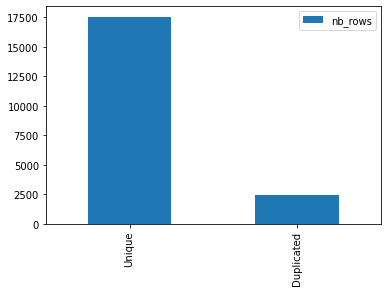

In [75]:
nb_duplicate_graph(df_patient,['given_name','surname'])

- **given_name + surname + postcode :**

3.02% (605/20000) of rows are duplicated


<AxesSubplot:>

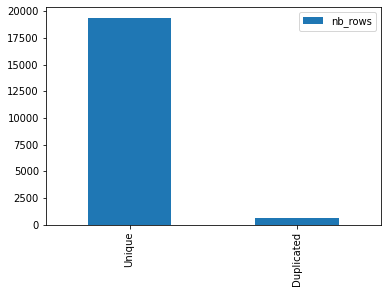

In [76]:
nb_duplicate_graph(df_patient,['given_name','surname','postcode'])

- **street_number + address_1 + suburb + postcode :**

2.15% (431/20000) of rows are duplicated


<AxesSubplot:>

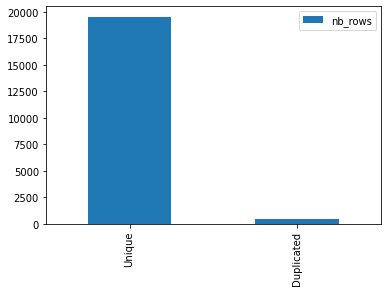

In [77]:
nb_duplicate_graph(df_patient,['street_number','address_1','suburb','postcode'])

- **given_name + surname + date_of_birth :**

2.17% (434/20000) of rows are duplicated


<AxesSubplot:>

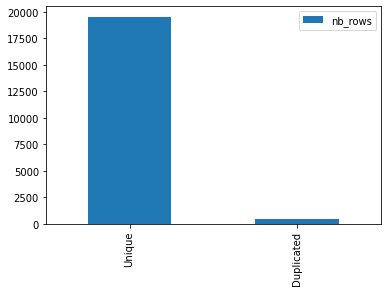

In [79]:
nb_duplicate_graph(df_patient,['given_name','surname','date_of_birth'])

- **phone_number :**

5.82% (1165/20000) of rows are duplicated


<AxesSubplot:>

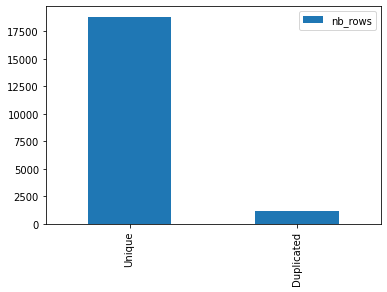

In [80]:
nb_duplicate_graph(df_patient,['phone_number'])

Malgré la très grande rapidité et facilité d'implémentation de cette méthode, elle n'est pas très fiable car le choix de la clé de dédoublement va être arbitraire. Même si les clés choisies sont discriminantes, on peut par exemple avoir un cas où tous les attributs choisis comme clé de dédoublement sont à NaN (et donc cela fausserait la détection de doublons) .<br/>
De plus, nous remarquons des résultats très versatiles. Exemple : En choisissant comme clé le nom+prénom, nous avons 12% de doublons, alors qu'en prenant le numéro de téléphone nous avons presque 6% de doublons, soit la moitié !

### Comparatif entre les 3 méthodes de détection de doublons

|Critère| Méthode 1 | Méthode 2 | Méthode 3|
|:-|:-|:-|:-|
|Rapidité|Très lente|Moyenne|Très rapide|
|Détection typos|Oui|Non|Non|
|Exactitude|Dépend de la distance maximale autorisée|Dépend de la similitude minimale choisie|Dépend des clés de dédoublement choisies (arbitraire)|

La méthode 1 même si très précise, ne peut pas être utilisée à cause de sa lenteur et la méthode 3 étant très arbitraire à cause du choix des clés de dédoublement, nous choisissons la 2ème méthode afin d'implémenter notre fonction `detect_duplicates`

# 5. Suppression de doublons

Notre fonction calcule pour chaque sample, la liste de ses doublons (grâce à la méthode df_similarity implementée ci-dessus), et supprime toutes les lignes les plus similaires (plus de 50% de similarité). Puis, retourne la dataframe sans ces doublons

In [167]:
def detect_duplicates(df):
    n = df.shape[0]
    for i in range(n):
        if i not in df.index:
            continue
        sims = df_similarity(df,i)
        if len(sims)>0:
            df.drop(sims,axis=0,inplace=True)
    return df

In [168]:
df_patient_copy = df_patient.copy()
df_patient_no_duplicates = detect_duplicates(df_patient_copy)

Après déduplication :

In [169]:
df_patient_no_duplicates

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,1971-07-08,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,1912-09-21,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,1981-09-05,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,1984-08-09,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,1934-04-30,31.0,03 69359594,None
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,368617,abby,None,19.0,john cleland crescent,boyne island,2290,nsw,1957-02-10,64.0,02 92489054,glenmore
19996,796658,dale,priest,19.0,bellchambers crescent,hoppers crossing,3033,wa,1959-06-19,31.0,07 20549476,None
19997,511885,alessia,mawlai,4.0,miller street,smithfield,3616,tas,NaT,26.0,03 83466737,None
19998,985932,hannah,mason,1.0,halligan place,beaumaris,2443,wa,1914-03-04,25.0,04 41125514,None


Nous implémentons une fonction qui permet de comparer entre la dataframe originale et dédupliquée :

In [170]:
def nb_duplicate_graph_bis(df_original,df_deduplicated):
    nb_duplicated = df_original.shape[0]-df_deduplicated.shape[0]
    nb_unique = df_deduplicated.shape[0]
    print(f'{np.round(nb_duplicated/df_original.shape[0]*100,2)}% ({nb_duplicated}/{df_original.shape[0]}) of rows are duplicated')
    return pd.DataFrame({'nb_rows':[nb_unique,nb_duplicated]},index=['Unique','Duplicated']).plot.bar()

5.62% (1124/20000) of rows are duplicated


<AxesSubplot:>

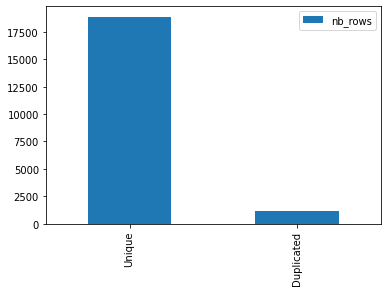

In [171]:
nb_duplicate_graph_bis(df_patient,df_patient_no_duplicates)

Nous estimons donc le pourcentage de données dupliquées à 5.62%

### Test de la fonction detect_duplicates

Pour faire les tests, nous allons nous restreindre à des sous dataframes plus petits (pris au hasard) pour que nous puissions comparer avec les résultats escomptés.

- **Test 1 :**

In [172]:
df_patient[df_patient['given_name']=='taalia']

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
1192,984011,taalia,alderman,NaN,blue springs,ballarat,3051,nt,1952-09-25,35.0,07 40705624,crowder circuit
1273,114060,taalia,glass,116.0,langdon avenue,noble park,6391,vic,1928-01-21,33.0,None,sunset
3232,701153,taalia,matthews,149.0,peden place,leumeah heights,3033,vic,1918-04-04,102.0,08 63562849,None
3872,210155,taalia,None,19.0,mcnicollyplace,orange,6230,vic,1918-06-03,64.0,02 00325977,None
4374,410655,taalia,matthews,326.0,mount vernon drive,albury,3029,None,1931-02-04,40.0,03 61765127,st helens
5126,694821,taalia,jolly,18.0,kater place,williamstown,5235,None,1909-01-17,32.0,07 53804707,None
7144,673212,taalia,blake,1675.0,craven place,delaneys creek,3104,None,1965-10-01,24.0,03 21422361,None
8010,378910,taalia,zaluski,14.0,cassia place,oatlands,2217,nsw,1949-09-25,11.0,04 46183105,None
8567,135709,taalia,alderman,NaN,crowder circuit,ballarat,3051,nt,1952-08-25,35.0,07 40705624,blue springs
8660,513440,taalia,hazell,43.0,evelyn owen crescent,plenty,6025,nsw,1972-10-26,33.0,07 93717103,mirani


Nous remarquons ici que nous avons `taalia alderman` et `taalia` de `mcnicoll place` qui sont dupliquées. Nous appliquons donc notre fonction de test :

In [173]:
def test1():
    df = df_patient[df_patient['given_name']=='taalia'].reset_index()
    initial_nb = df.shape[0]
    df_patient_test = detect_duplicates(df)
    assert df_patient_test.shape[0] == initial_nb-2
    print('OK')

In [174]:
test1()

OK


- **Test 2 :**

In [175]:
df_patient[df_patient['given_name']=='elizabeth'].sort_values(by='phone_number')

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
19646,172439,elizabeth,lombardi,34.0,cahalan place,bundaberg,2284,vic,1922-05-29,9.0,02 16328719,moondani
2770,356911,elizabeth,tilker,72.0,galan place,scarborough,4110,qld,1981-01-10,30.0,02 44764743,rsd frareen
18449,679088,elizabeth,white,4.0,anembo street,munno para,3324,nsw,1972-02-23,21.0,03 19901201,stoney creek street
11350,968408,elizabeth,robson,40.0,glenorchy street,botany,4735,nsw,1956-12-02,21.0,03 32688782,north burradoo
1389,127632,elizabeth,benjamin,45.0,inglis place,bundaberg,2536,vic,1953-08-30,13.0,03 53675194,rowethorpe
14262,820489,elizabeth,iliffe,87.0,kitson place,currajong,2530,None,1976-05-18,44.0,03 56350576,None
15839,129986,elizabeth,green,22.0,collings street,frankston,2147,vic,NaT,11.0,03 58458349,santa lucille
6985,146250,elizabeth,hope,90.0,devonport street,yangebup,3103,nsw,1927-05-31,24.0,04 20824770,shelbourne woodstock
19238,280653,elizabeth,csomor,35.0,rowe place,clayton,4670,nsw,1960-06-25,60.0,04 37713840,None
5749,480172,elizabeth,crapp,78.0,raymond street,parkside,3037,qld,1907-02-05,22.0,04 58525856,None


`elizabeth colquhoun` apparait trois fois, avec un âge différent et des typos pour la colonne `suburb` et `postcode`, et un state manquant 2 fois. On devrait donc avoir 2 lignes en moins.

In [176]:
def test2():
    df = df_patient[df_patient['given_name']=='elizabeth'].reset_index()
    initial_nb = df.shape[0]
    df_patient_test = detect_duplicates(df)
    assert df_patient_test.shape[0] == initial_nb-2
    print('OK')

In [177]:
test2()

OK


In [178]:
df_patient[df_patient['given_name']=='beth'].sort_values(by='phone_number')

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
9713,438144,beth,leong,18.0,perry drive,burnside,3783,vic,1992-04-28,31.0,02 15713093,None
14366,929119,beth,demetriou,40.0,maraar place,roxburgh park,4213,nsw,1941-04-23,79.0,04 03406833,None
4415,415261,beth,waller,4.0,hotham crescent,naracoorte,2134,act,1999-06-18,10.0,04 53049537,None
3783,615693,beth,hibenic,84.0,amadeus place,nicholls,3142,nsw,1955-05-07,19.0,04 82438329,None
16900,797621,beth,muhldorff,12.0,isles place,ballarat north,3174,sa,1998-01-28,31.0,04 89403838,None
6056,331318,beth,ryan,14.0,wolfingham place,elsternwick,2030,nsw,1981-12-10,19.0,07 49038814,None
3245,294509,beth,jessup,696.0,maitland street,lance creek,3844,nsw,1932-11-23,26.0,08 34815487,allan dale
7440,211361,beth,jessup,696.0,maitland street,lance creek,3844,nsw,1932-11-23,26.0,08 34815487,allandale
14782,601498,beth,jessup,696.0,maitlandcztreet,lance creek,3844,nsw,1932-11-23,26.0,08 34815487,allan dale
12625,637068,beth,kluske,13.0,carslake loop,mallacoota,2150,nsw,NaT,29.0,08 56829167,None


beth jessup est répétée 3 fois (avec un typo dans `address_1` et `address_2`), beth clarke 4 fois (avec un typo dans `surname` et `address_1`), on devrait donc avoir 5 lignes en moins.

In [179]:
def test3():
    df = df_patient[df_patient['given_name']=='beth'].reset_index()
    initial_nb = df.shape[0]
    df_patient_test = detect_duplicates(df)
    assert df_patient_test.shape[0] == initial_nb-5
    print('OK')

In [180]:
test3()

OK


Nous concluons que la fonction fonctionne assez bien, même si certaines lignes avec beaucoup de valeurs différentes ne sont pas parfois détectées.

Enfin, nous sauvegardons nos résultats :

In [182]:
df_patient_no_duplicates.to_csv('df_patient.csv',sep=';',index=False)
df_pcr.to_csv('df_pcr.csv',sep=';',index=False)